In [5]:
#@title 1. Montar drive (If you are in in colab){ display-mode: "form" }

import os
from google.colab import drive
path =  "/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project"#@param {type:"string"}
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project


In [2]:
#@title 2. Load libraries { display-mode: "form" }
import numpy as np
import pandas as pd 
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import json
import os
from tqdm import tqdm
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 3. Descargar datos

In [7]:
try:
    os.mkdir('data')
except OSError:
    print ("Creation of the directory %s failed")
else:
    print ("Successfully created the directory %s ")
os.chdir('data')
print(os.getcwd())

Successfully created the directory %s 
/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project/data


In [8]:
import os
os.environ['KAGGLE_USERNAME'] = "jamf05" # username from the json file
os.environ['KAGGLE_KEY'] = "33b44029575614b1c82d40d85690cbac" # key from the json file
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 46.2MB/s]


>**Nota:** Omitir la descarga si ya tiene el archivo **emotions-dataset-for-nlp.zip**

In [11]:
!unzip 'emotions-dataset-for-nlp.zip'

Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


In [12]:
os.chdir(path)
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project


## 4. Tratamiento de datos

Procedemos a cargar el dataset y a concatenar para armar el compendio de frases y su respectivo sentimiento. Hay que tener en cuenta que tenemos que analizar y categorizar numericamente los datos de `label`, ademas de secuenciar numericamente (`tokenizar`) mis frases.

In [13]:
#Carga de los datasets separados
data_train = pd.read_csv("data/train.txt", delimiter=';',header=None, names=['sentence','label'])
data_val = pd.read_csv("data/val.txt", delimiter=';',header=None, names=['sentence','label'])
data_test = pd.read_csv("data/test.txt", delimiter=';',header=None, names=['sentence','label'])
data_train.shape,data_test.shape,data_val.shape

((16000, 2), (2000, 2), (2000, 2))

Juntamos los tres datasets agrupados en uno solo para empezar a realizar los cambios

In [14]:
#Concatenacion
dataset = pd.concat([data_train,data_val,data_test])
dataset.shape

(20000, 2)

Comprobamos las etiquetas disponibles de los sentimientos que expresa cada frase

In [15]:
dataset['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

**Nota:** JORGE PRESENTAMOS UN DESBALANCEAMIENTO EN LAS FRASES CATEGORIZADAS

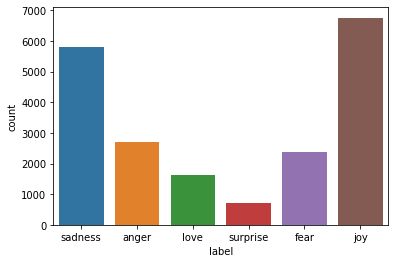

In [16]:
#Distribucion de la categorizacion de las frases en el dataset
sb.countplot(dataset.label)

Categorizamos numericamente los labels 

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#Agregamos la columna con la codificacion de labels en el dataset
dataset['label_enc'] = labelencoder.fit_transform(dataset['label'])
#Renombramos las columnas
dataset.rename(columns={'label':'label_desc'},inplace=True)
dataset.rename(columns={'label_enc':'label'},inplace=True)
dataset.head()

,sentence,label_desc,label
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,4
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,3
4,i am feeling grouchy,anger,0


In [19]:
#Identificamos el label numerico con su respectivo en texto
dataset[['label','label_desc']].drop_duplicates(keep='first')

,label,label_desc
0,4,sadness
2,0,anger
3,3,love
6,5,surprise
7,1,fear
8,2,joy


Mostramos la distribucion de los datos basada en los labels

In [20]:
#check distribution of data based on labels
print("Distribution of data based on labels: ",dataset.label.value_counts())

Distribution of data based on labels:  2    6761
4    5797
0    2709
1    2373
3    1641
5     719
Name: label, dtype: int64


## 5. Referencias

- Explore Spanish news articles - Webhose’s Free Datasets [[++](https://webhose.io/free-datasets/spanish-news-articles/)]
- [[++](https://www.google.com)]
- [[++](https://www.google.com)]
- [[++](https://www.google.com)]
- [[++](https://www.google.com)]